In [1]:
using Pkg
Pkg.activate("../")

  Activating project at `~/work`


In [2]:
# load functions
include("../src/eigen.jl")
include("../src/eigen_setup.jl")
include("../src/eigen_output.jl")

┌ Warning: RCall.jl: Warning in (function (pop, age.limits, pop.age.column = "lower.age.limit",  :
│   Not all age groups represented in population data (5-year age band).
│   Linearly estimating age group sizes from the 5-year bands.
└ @ RCall /opt/julia/packages/RCall/0ggIQ/src/io.jl:172
┌ Warning: RCall.jl: Warning in (function (pop, age.limits, pop.age.column = "lower.age.limit",  :
│   Not all age groups represented in population data (5-year age band).
│   Linearly estimating age group sizes from the 5-year bands.
└ @ RCall /opt/julia/packages/RCall/0ggIQ/src/io.jl:172
┌ Warning: RCall.jl: Warning in (function (pop, age.limits, pop.age.column = "lower.age.limit",  :
│   Not all age groups represented in population data (5-year age band).
│   Linearly estimating age group sizes from the 5-year bands.
└ @ RCall /opt/julia/packages/RCall/0ggIQ/src/io.jl:172
┌ Warning: RCall.jl: Warning in (function (pop, age.limits, pop.age.column = "lower.age.limit",  :
│   Not all age groups repre

vaccineRmap (generic function with 1 method)

In [3]:
# write data
# include("../src/data.jl");

# load data
#datasets = readJSON(dir = "../data/pyramid/")

# load MCMC results
loadfit = load("../outputs/sexualfit_main.jld2")

Dict{String, Any} with 5 entries:
  "burundi2024_fit"    => (zmb_fit = (all = ContactMatrix([[0.0 0.0 … 0.0 0.0; …
  "kivu2024_fit"       => (zmb_fit = (all = ContactMatrix([[0.0 0.0 … 0.0 0.0; …
  "endemic2015_24_fit" => (zmb_fit = (all = ContactMatrix[ContactMatrix([[1.167…
  "otherhz2024_fit"    => (zmb_fit = (all = ContactMatrix([[0.0 0.0 … 0.0 0.0; …
  "kamituga2024_fit"   => (zmb_fit = (all = ContactMatrix([[0.0 0.0 … 0.0 0.0; …

In [4]:
gr(fontfamily="Helvetica",foreground_color_legend = nothing,background_color_legend = nothing, titlefontsize=11, tickfontsize=10, legendfontsize=8,labelfontsize=10,grid=true, tick_direction=:out,size=(400,300))

Plots.GRBackend()

In [5]:
# Fit to 2011-15 data in Tshuapa
tshuapaplot = plot(tshuapa_h2hag,color=:black)
tshuapa2015_fit = output_fit(
    tshuapa_h2hag,
    zmb_skeleton = zmb2015,
    drc_skeleton = drc2015,
    dataplots = tshuapaplot,
    bayesian=true
    );
zmb2015_fit = tshuapa2015_fit.zmb_fit;

method: importance sampling resampling
method: importance sampling resampling
method: importance sampling resampling
method: importance sampling resampling
method: importance sampling resampling
method: importance sampling resampling


In [6]:
# Fit to 2024 data in DRC (only required for validation in the next cell)
endemicplot = plot(plot(drc_endemic_ag),ylim=(0,0.35),xtickfontsize=9);
endemic2024_fit = output_fit(
    drc_endemic_ag,
    zmb_skeleton = zmb2024,
    drc_skeleton = drc2024,
    dataplots = endemicplot,
    bayesian=true
    );

method: importance sampling resampling
method: importance sampling resampling
method: importance sampling resampling
method: importance sampling resampling
method: importance sampling resampling
method: importance sampling resampling


In [7]:
endemicplot = plot(plot(drc_endemic_ag),ylim=(0,0.35),xtickfontsize=9);
endemic2024_validate = output_validate(
    drc_endemic_ag,
    zmb_skeleton = endemic2024_fit.zmb_fit,
    zmb_ref = tshuapa2015_fit.zmb_fit,
    drc_skeleton = endemic2024_fit.drc_fit,
    drc_ref = tshuapa2015_fit.drc_fit,
    dataplots = endemicplot,
    bayesian=true
    );

likelihood.(pyramid, zmb_fit |> collect) = [-22.332869229646313, -22.608023855645264, -21.17104244162281, -21.849931137656924]
(mean.(lls_zmb), std.(lls_zmb) ./ (ess .- 1)) = ([-23.3744460559684, -23.73211849206237, -22.34699907929347, -22.996628344046627], [0.00061332271701082, 0.0006732599751536149, 0.0006341797834722835, 0.0006706001481104078])
(mean.(lls_zmb) .- logpdf(Multinomial(sum(vcases), vcases ./ sum(vcases)), vcases)) ./ sum(vcases) = [-0.008831797216987042, -0.009573856213032623, -0.006700164485296321, -0.008047943042875481]
likelihood.(pyramid, drc_fit |> collect) = [-38.80741750100772, -30.107965041965898]
(mean.(lls_drc), std.(lls_drc) ./ (ess .- 1)) = ([-39.8689005616959, -31.29723652626379], [0.0007326859451141984, 0.0007297654496865965])
(mean.(lls_drc) .- logpdf(Multinomial(sum(vcases), vcases ./ sum(vcases)), vcases)) ./ sum(vcases) = [-0.04305265718737605, -0.025269121844155907]


In [8]:
# Fit to both 2015 and 2024 clade Ia data
Random.seed!(1)
endemic2015_24_fit = output_fit(
    [tshuapa_h2hag,drc_endemic_ag];
    zmb_skeleton = [zmb2015,zmb2024],
    drc_skeleton = [drc2015,drc2024],
    dataplots = [tshuapaplot,endemicplot],
    bayesian=true
    );
zmb2015_24_fit = endemic2015_24_fit.zmb_fit
drc2015_24_fit = endemic2015_24_fit.drc_fit;

method: importance sampling resampling
method: importance sampling resampling
method: importance sampling resampling
method: importance sampling resampling
method: importance sampling resampling
method: importance sampling resampling


In [9]:
drc_kamituga = aggregateagegroups(readJSON(:drc_kamituga_Aug2024),[0:5:20;30:10:50])
burundi = aggregateagegroups(readJSON(:burundi_Aug2024),[0:5:15;20:10:50])
drc_otherhz = aggregateagegroups(readJSON(:drc_otherhz_Aug2024),[0:5:15;20:10:50])
otherhzplot = plot(plot(drc_otherhz,color = [1 2]),ylim=(0,0.5),xtickfontsize=9)
burundiplot = plot(plot(drc_otherhz,color = [1 2]),ylim=(0,0.5),xtickfontsize=9)
kamitugaplot = plot(plot(drc_kamituga,color=[1 2]),ylim=(0,0.5),size=(600,300))

drc_kivu = aggregateagegroups(readJSON(:drc_kivu_Aug2024),[0:5:15;20:10:50])
kivuplot = plot(plot(drc_kivu),ylim=(0,0.5),xtickfontsize=9);

In [10]:
zmb2024_sexual = addsexualcontact!(deepcopy(zmb2024),[15;20:10:40]; modifier! = propmix!, countrycode = "COD",year = 2024);
drc2024_sexual = addsexualcontact!(deepcopy(drc2024),[15;20:10:40]; modifier! = propmix!, countrycode = "COD",year = 2024);

In [11]:
kamituga2024_fit = output_sexual_fit(
    drc_kamituga,
    zmb_sexual_skeleton = zmb2024_sexual,
    zmb_ref=last.(zmb2015_24_fit|>collect),
    drc_sexual_skeleton = drc2024_sexual,
    drc_ref=last.(drc2015_24_fit|>collect),
    dataplots = collapseplot(drc_kamituga),
    estkeys = [Symbol.(["1_" "2_"],"addmat",4:7)|>vec;:addmat_v;:addmat_w],
    bayesian=true,
    load = loadfit["kamituga2024_fit"]
  );

In [12]:
kivu2024_fit = output_sexual_fit(
    drc_kivu,
    zmb_sexual_skeleton = zmb2024_sexual,
    zmb_ref=last.(zmb2015_24_fit|>collect),
    drc_sexual_skeleton = drc2024_sexual,
    drc_ref=last.(drc2015_24_fit|>collect),
    dataplots = collapseplot(drc_kivu),
    estkeys = [Symbol.(["1_" "2_"],"addmat",4:7)|>vec;:addmat_v;:addmat_w],
    bayesian=true,
    load=loadfit["kivu2024_fit"]
    );

In [13]:
otherhz2024_fit = output_sexual_fit(
    drc_otherhz,
    zmb_sexual_skeleton = zmb2024_sexual,
    zmb_ref=last.(zmb2015_24_fit|>collect),
    drc_sexual_skeleton = drc2024_sexual,
    drc_ref=last.(drc2015_24_fit|>collect),
    dataplots = collapseplot(drc_otherhz),
    estkeys = [Symbol.(["1_" "2_"],"addmat",4:7)|>vec;:addmat_v;:addmat_w],
    bayesian=true,
    load=loadfit["otherhz2024_fit"]
    );

In [14]:
zmb2024_sexual_b = addsexualcontact!(deepcopy(bdi2024),[15;20:10:40]; modifier! = propmix!, countrycode = "BDIC",year = 2024);
drc2024_sexual_b = addsexualcontact!(deepcopy(bdi_s2024),[15;20:10:40]; modifier! = propmix!, countrycode = "BDIC",year = 2024);

burundi = aggregateagegroups(readJSON(:burundi_Oct2024),[0:5:15;20:10:50])
burundi0 = aggregateagegroups(readJSON(:burundi_midSep2024),[0:5:15;20:10:50])
burundi.cases .-= broadcast.(min,burundi0.cases,burundi.cases)

zmb_ref = deepcopy(last.(zmb2015_24_fit|>collect))
drc_ref = deepcopy(last.(drc2015_24_fit|>collect))

for cmt in zmb_ref
    cmt.parameters[:s_vax].=1-(1-cmt.parameters[:s_vax][])*1.0
end
for cmt in drc_ref
    cmt.parameters[:s_vax].=1-(1-cmt.parameters[:s_vax][])*1.0
end

burundi2024_fit = output_sexual_fit(
    burundi,
    zmb_sexual_skeleton = zmb2024_sexual_b,
    zmb_ref=zmb_ref,
    drc_sexual_skeleton = drc2024_sexual_b,
    drc_ref=drc_ref,
    dataplots = collapseplot(burundi),
    estkeys = [Symbol.(["1_" "2_"],"addmat",4:7)|>vec;:addmat_v;:addmat_w],
    bayesian=true,
    load=loadfit["burundi2024_fit"]
    );

In [15]:
kamituga2024_skeleton=deepcopy(kamituga2024_fit)
for cm in kamituga2024_skeleton.zmb_fit for el in cm.addmat el.*=0. end end
for cm in kamituga2024_skeleton.drc_fit for el in cm.addmat el.*=0. end end
kamituga2024_validate = output_validate(
    drc_kamituga,
    zmb_skeleton = kamituga2024_skeleton.zmb_fit,
    zmb_ref = zmb2015_24_fit|>collect.|>first,
    drc_skeleton = kamituga2024_skeleton.drc_fit,
    drc_ref = drc2015_24_fit|>collect.|>first,
    dataplots = drc_kamituga|>collapseplot,
    bayesian=true
    );

likelihood.(pyramid, zmb_fit |> collect) = [-295.9184269344458, -300.36284660262174, -256.40715589955715, -251.23540198611238]
(mean.(lls_zmb), std.(lls_zmb) ./ (ess .- 1)) = ([-109.62345924077916, -81.89944178267038, -52.15253984700304, -50.21983478940915], [0.011962194715187792, 0.010176024502482126, 0.002531056328491537, 0.0017114461962626638])
(mean.(lls_zmb) .- logpdf(Multinomial(sum(vcases), vcases ./ sum(vcases)), vcases)) ./ sum(vcases) = [-0.10086969474467627, -0.06262967066452625, -0.021599461098088538, -0.018933661018648688]
likelihood.(pyramid, drc_fit |> collect) = [-426.3019345880045, -374.6703883061484]
(mean.(lls_drc), std.(lls_drc) ./ (ess .- 1)) = ([-185.8259479164654, -65.26266138904543], [0.01455981620945992, 0.0047550990265695465])
(mean.(lls_drc) .- logpdf(Multinomial(sum(vcases), vcases ./ sum(vcases)), vcases)) ./ sum(vcases) = [-0.2059765756766573, -0.039682387362974594]


In [16]:
otherhz2024_skeleton=deepcopy(otherhz2024_fit)
for cm in otherhz2024_skeleton.zmb_fit for el in cm.addmat el.*=0. end end
for cm in otherhz2024_skeleton.drc_fit for el in cm.addmat el.*=0. end end
otherhz2024_validate = output_validate(
    drc_otherhz,
    zmb_skeleton = otherhz2024_skeleton.zmb_fit,
    zmb_ref = zmb2015_24_fit|>collect.|>first,
    drc_skeleton = otherhz2024_skeleton.drc_fit,
    drc_ref = drc2015_24_fit|>collect.|>first,
    dataplots = drc_otherhz|>collapseplot,
    bayesian=true
    );

likelihood.(pyramid, zmb_fit |> collect) = [-80.51479194760141, -80.13878810900667, -72.30418828416012, -71.30198922231199]
(mean.(lls_zmb), std.(lls_zmb) ./ (ess .- 1)) = ([-72.3042858475021, -66.44546183506067, -62.22856041795703, -61.90358941353258], [0.0020190813587339105, 0.0017046359992081957, 0.000191593040611413, 0.00012491570202841998])
(mean.(lls_zmb) .- logpdf(Multinomial(sum(vcases), vcases ./ sum(vcases)), vcases)) ./ sum(vcases) = [-0.07071554214358448, -0.05922765192311109, -0.050959217771927474, -0.0503220197240364]
likelihood.(pyramid, drc_fit |> collect) = [-116.25034156621984, -102.29621961589595]
(mean.(lls_drc), std.(lls_drc) ./ (ess .- 1)) = ([-104.33352182287457, -67.40307894720745], [0.004204507235388717, 0.0006118614335970935])
(mean.(lls_drc) .- logpdf(Multinomial(sum(vcases), vcases ./ sum(vcases)), vcases)) ./ sum(vcases) = [-0.13351796562470697, -0.06110533253516359]


In [17]:
kivu2024_skeleton=deepcopy(kivu2024_fit)
for cm in kivu2024_skeleton.zmb_fit for el in cm.addmat el.*=0. end end
for cm in kivu2024_skeleton.drc_fit for el in cm.addmat el.*=0. end end
kivu2024_validate = output_validate(
    drc_kivu,
    zmb_skeleton = kivu2024_skeleton.zmb_fit,
    zmb_ref = zmb2015_24_fit|>collect.|>first,
    drc_skeleton = kivu2024_skeleton.drc_fit,
    drc_ref = drc2015_24_fit|>collect.|>first,
    dataplots = drc_kivu|>collapseplot,
    bayesian=true
    );

likelihood.(pyramid, zmb_fit |> collect) = [-316.42280650230344, -321.90403838387203, -263.7007118310528, -257.25935059895164]
(mean.(lls_zmb), std.(lls_zmb) ./ (ess .- 1)) = ([-142.6589880713844, -108.81848771155792, -74.11044987263982, -72.80205914242487], [0.014293762895008645, 0.012136527637171643, 0.0024852940911503823, 0.0020340130184970506])
(mean.(lls_zmb) .- logpdf(Multinomial(sum(vcases), vcases ./ sum(vcases)), vcases)) ./ sum(vcases) = [-0.07264894292318445, -0.04807341615497349, -0.022867869430995207, -0.021917694608762125]
likelihood.(pyramid, drc_fit |> collect) = [-506.5456297458498, -431.3875281171221]
(mean.(lls_drc), std.(lls_drc) ./ (ess .- 1)) = ([-260.47248083976217, -93.71113088312192], [0.01926941590599494, 0.005155397924302941])
(mean.(lls_drc) .- logpdf(Multinomial(sum(vcases), vcases ./ sum(vcases)), vcases)) ./ sum(vcases) = [-0.15820703498446098, -0.037102205676806464]


In [18]:
burundi2024_skeleton=deepcopy(burundi2024_fit)
for cm in burundi2024_skeleton.zmb_fit for el in cm.addmat el.*=0. end end
for cm in burundi2024_skeleton.drc_fit for el in cm.addmat el.*=0. end end
burundi2024_validate = output_validate(
    burundi,
    zmb_skeleton = burundi2024_skeleton.zmb_fit,
    zmb_ref = zmb_ref,
    drc_skeleton = burundi2024_skeleton.drc_fit,
    drc_ref = drc_ref,
    dataplots = burundi|>collapseplot,
    bayesian=true
    );

likelihood.(pyramid, zmb_fit |> collect) = [-138.4645235098198, -135.3441092183014, -113.57156900376737, -106.1990845413765]
(mean.(lls_zmb), std.(lls_zmb) ./ (ess .- 1)) = ([-115.76229277056453, -102.12930102969918, -80.71044059665847, -74.1960034786427], [0.004343557925101903, 0.004198181983447631, 0.001600714688981688, 0.0008044790624287875])
(mean.(lls_zmb) .- logpdf(Multinomial(sum(vcases), vcases ./ sum(vcases)), vcases)) ./ sum(vcases) = [-0.07985614220747148, -0.06542969592084147, -0.04276423514513702, -0.03587065089326847]
likelihood.(pyramid, drc_fit |> collect) = [-184.50361635843197, -142.77624443635867]
(mean.(lls_drc), std.(lls_drc) ./ (ess .- 1)) = ([-169.11547446268443, -81.64073239399508], [0.0057401550998972695, 0.003179855554545841])
(mean.(lls_drc) .- logpdf(Multinomial(sum(vcases), vcases ./ sum(vcases)), vcases)) ./ sum(vcases) = [-0.13631453553246606, -0.043748670909514384]


In [19]:
# save results
outputdict = Dict(["endemic2015_24_fit","kamituga2024_fit","otherhz2024_fit","kivu2024_fit","burundi2024_fit"].=>[endemic2015_24_fit, kamituga2024_fit,otherhz2024_fit,kivu2024_fit,burundi2024_fit])
#@suppress(save("../outputs/sexualfit_main2.jld2",outputdict))

Dict{String, NamedTuple{(:zmb_fit, :zmb_plot, :drc_fit, :drc_plot)}} with 5 entries:
  "burundi2024_fit"    => (zmb_fit = (all = ContactMatrix([[0.0 0.0 … 0.0 0.0; …
  "kivu2024_fit"       => (zmb_fit = (all = ContactMatrix([[0.0 0.0 … 0.0 0.0; …
  "endemic2015_24_fit" => (zmb_fit = (all = ContactMatrix[ContactMatrix([[1.167…
  "otherhz2024_fit"    => (zmb_fit = (all = ContactMatrix([[0.0 0.0 … 0.0 0.0; …
  "kamituga2024_fit"   => (zmb_fit = (all = ContactMatrix([[0.0 0.0 … 0.0 0.0; …

## Main figures

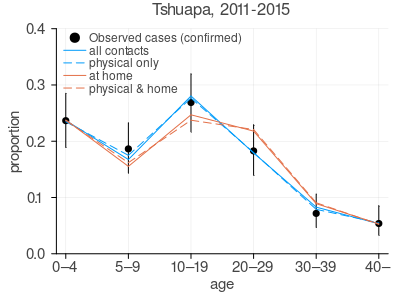

In [20]:
plot(endemic2015_24_fit.zmb_plot[1], title="Tshuapa, 2011-2015") |>savefigname("../figs/fig1/raw/tshuapa.svg", save = false)

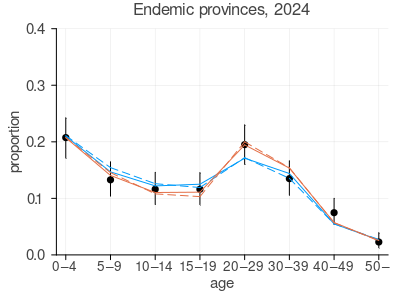

In [21]:
plot(endemic2015_24_fit.zmb_plot[2], title="Endemic provinces, 2024",legend=:none) |>savefigname("../figs/fig1/raw/endemicprovs.svg", save = false)

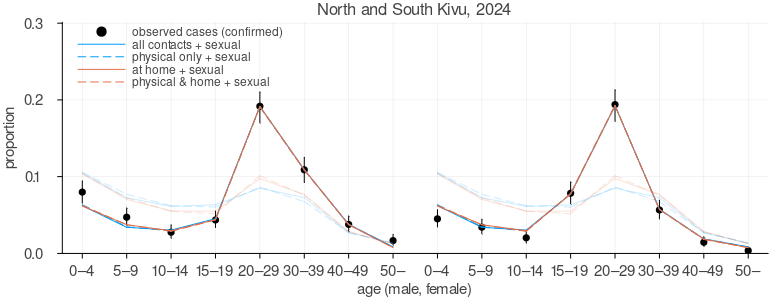

In [22]:
plot(kivu2024_fit.zmb_plot, kivu2024_validate.zmb_fit|>collect, title="North and South Kivu, 2024",size=(780,300),xrotation=0,bottom_margin=4Plots.PlotMeasures.mm,ylim=(0,0.301),
color =[1 1 2 2],linestyle=[:solid :dash],linealpha=[fill(0.2,7);0],label=:none,left_margin=3Plots.PlotMeasures.mm,xlabel="age (male, female)") |>savefigname("../figs/fig1/raw/kivu.svg", save = false)

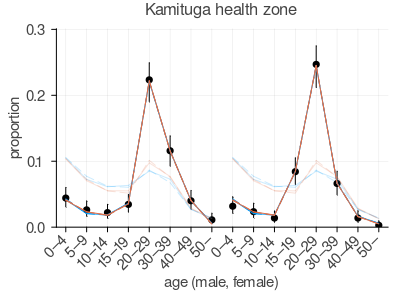

In [23]:
plot(kamituga2024_fit.zmb_plot, kamituga2024_validate.zmb_fit|>collect, title="Kamituga health zone",size=(400,300),xrotation=45,bottom_margin=3Plots.PlotMeasures.mm,legend=:none,ylim=(0,0.301),
    color =[1 1 2 2],linestyle=[:solid :dash],linealpha=[fill(0.2,7);0],label=:none,xlabel="age (male, female)") |>savefigname("../figs/fig1/raw/kamituga.svg", save = false)

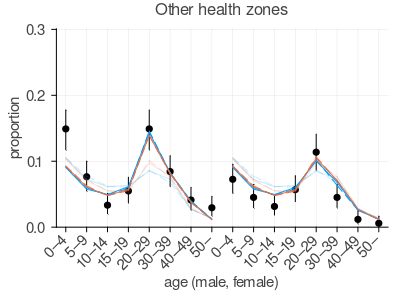

In [24]:
plot(otherhz2024_fit.zmb_plot, otherhz2024_validate.zmb_fit|>collect, title="Other health zones",size=(400,300),xrotation=45,bottom_margin=3Plots.PlotMeasures.mm,legend=:none,ylim=(0,0.301),
        color =[1 1 2 2],linestyle=[:solid :dash],linealpha=[fill(0.2,7);0],label=:none, xlabel="age (male, female)") |>savefigname("../figs/fig1/raw/otherhz.svg", save = false)

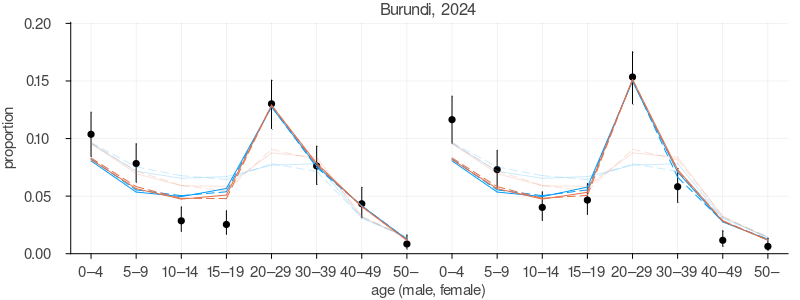

In [25]:
plot(burundi2024_fit.zmb_plot, burundi2024_validate.zmb_fit|>collect, title="Burundi, 2024",size=(800,300),xrotation=0,bottom_margin=4Plots.PlotMeasures.mm,legend=:none,ylim=(0,0.201),
        color =[1 1 2 2],linestyle=[:solid :dash],linealpha=[fill(0.2,7);0],label=:none,xlabel="age (male, female)",left_margin=3Plots.PlotMeasures.mm)|>savefigname("../figs/fig1/raw/burundi.svg",save=false)

## Results summary

In [26]:
est_kivu = CrI(kivu2024_fit.zmb_fit)
est_kamituga = CrI(kamituga2024_fit.zmb_fit)
est_otherhz = CrI(otherhz2024_fit.zmb_fit)
est_burundi = CrI(burundi2024_fit.zmb_fit);

# model weights
Ib_weights = pweights([0.21, 0.33,0.29,0.17])

4-element ProbabilityWeights{Float64, Float64, Vector{Float64}}:
 0.21
 0.33
 0.29
 0.17

In [27]:
eig_kamituga=b_eigenanalysis(kamituga2024_fit.zmb_fit)
eig_kivu=b_eigenanalysis(kivu2024_fit.zmb_fit)
eig_otherhz=b_eigenanalysis(otherhz2024_fit.zmb_fit)
eig_burundi=b_eigenanalysis(burundi2024_fit.zmb_fit);

In [28]:
# model averaged susceptibility estimates
sus_0_5=MixtureModel(posteriordist.(zmb2015_24_fit|>collect.|>first,1),Ib_weights)
(median(sus_0_5),quantile(sus_0_5,[0.025,0.975]))|>display

sus_vax=MixtureModel(posteriordist.(zmb2015_24_fit|>collect.|>first,2),Ib_weights)
(median(sus_vax),quantile(sus_vax,[0.025,0.975]))|>display


(1.520062461208138, [1.0450988732252076, 2.046361462112099])

(0.2619563383086909, [0.16616262448391067, 0.38865298758105493])

In [29]:
[quantile.(sus_0_5.components,q) for q in (0.025,0.5,0.975)]|>display
[quantile.(sus_vax.components,q) for q in (0.025,0.5,0.975)]|>display

3-element Vector{Vector{Float64}}:
 [1.5862609665652392, 1.3844112887674391, 1.0799762280797487, 0.9594957549569496]
 [1.8656370305533727, 1.6457023037203056, 1.3177479551256468, 1.1593251754227547]
 [2.165929511227066, 1.9356659633783753, 1.5509119024785463, 1.3936713082453283]

3-element Vector{Vector{Float64}}:
 [0.18547380837187477, 0.2034746073614227, 0.14909331372865908, 0.16616262449291275]
 [0.26925900487543575, 0.2991429487999393, 0.22799692632926533, 0.24566505407016592]
 [0.3805039783508276, 0.41287406508018826, 0.3293913496446504, 0.34888140656335753]

In [30]:
# fraction of R0 attributable to sexual transmisssion
frac_R0_samples =[ (broadcast.(-,1, broadcast.(/,eig.eigval0, eig.eigval))) for eig in [eig_kivu, eig_kamituga, eig_otherhz, eig_burundi]]
frac_R0 = [MixtureModel([MixtureModel(Normal.(post,0)) for post in loc],Ib_weights) for loc in frac_R0_samples]
quantile.(frac_R0,Ref([0.025,0.5,0.975]))|>display
[quantile.(loc.components,Ref([0.025,0.5,0.975])) for loc in frac_R0]

4-element Vector{Vector{Float64}}:
 [0.37101472162930127, 0.41832532912821585, 0.46544165020605116]
 [0.5526082258471321, 0.6151485576860465, 0.6757272684987097]
 [0.060862392681624744, 0.13530864111426327, 0.2060081540118072]
 [0.11484697256412921, 0.15733507775990035, 0.19885806907096087]

4-element Vector{Vector{Vector{Float64}}}:
 [[0.364364248918457, 0.405254435564778, 0.4482153135259307], [0.36978894633590575, 0.415916046636687, 0.45722698007272705], [0.38054104281673007, 0.4270367864727439, 0.4733021484571478], [0.37677816206068987, 0.4244796229094819, 0.47378125587391906]]
 [[0.5418118422776335, 0.6024780685375042, 0.6595522063174015], [0.5489935441789315, 0.6075430342685342, 0.6643692288843523], [0.5677683011691838, 0.6290423141660179, 0.6871005406305072], [0.566065064226259, 0.6262366560529238, 0.6803888524979718]]
 [[0.08616394809026773, 0.1418040577608375, 0.20626123021852832], [0.09241944265089937, 0.14916512171371332, 0.2146262977589833], [0.04596486731387997, 0.12212195056709171, 0.19452626743302145], [0.04438126777319376, 0.11840068886829622, 0.19160156132255302]]
 [[0.12108439482905378, 0.1584070770526888, 0.19829144414673716], [0.12613262902073552, 0.16353680665023507, 0.2033752812173782], [0.11187992054673385, 0.15401155928697613, 0.1969223016785544], [0

In [31]:
# fraction of R0 attributable to sexual transmisssion: Synthetic matrix
module Synthetic_R0
eig_kamituga=Main.b_eigenanalysis(Main.kamituga2024_fit.drc_fit)
eig_kivu=Main.b_eigenanalysis(Main.kivu2024_fit.drc_fit)
eig_otherhz=Main.b_eigenanalysis(Main.otherhz2024_fit.drc_fit)
eig_burundi=Main.b_eigenanalysis(Main.burundi2024_fit.drc_fit);
frac_R0_samples =[ (broadcast.(-,1, broadcast.(/,eig.eigval0, eig.eigval))) for eig in [eig_kivu, eig_kamituga, eig_otherhz, eig_burundi]]
frac_R0 = [Main.MixtureModel([Main.MixtureModel(Main.Normal.(post,0)) for post in loc],Main.pweights([0,1])) for loc in frac_R0_samples]
Main.quantile.(frac_R0,Ref([0.025,0.5,0.975]))|>display
end

4-element Vector{Vector{Float64}}:
 [0.4399238874583984, 0.48324493966529103, 0.5245861371075976]
 [0.6079595156270307, 0.6612321592822933, 0.7109358411193601]
 [0.14873225181757654, 0.2163092138308914, 0.28359029885401243]
 [0.16448555048322702, 0.21207662215076775, 0.2617573217400565]

Main.Synthetic_R0

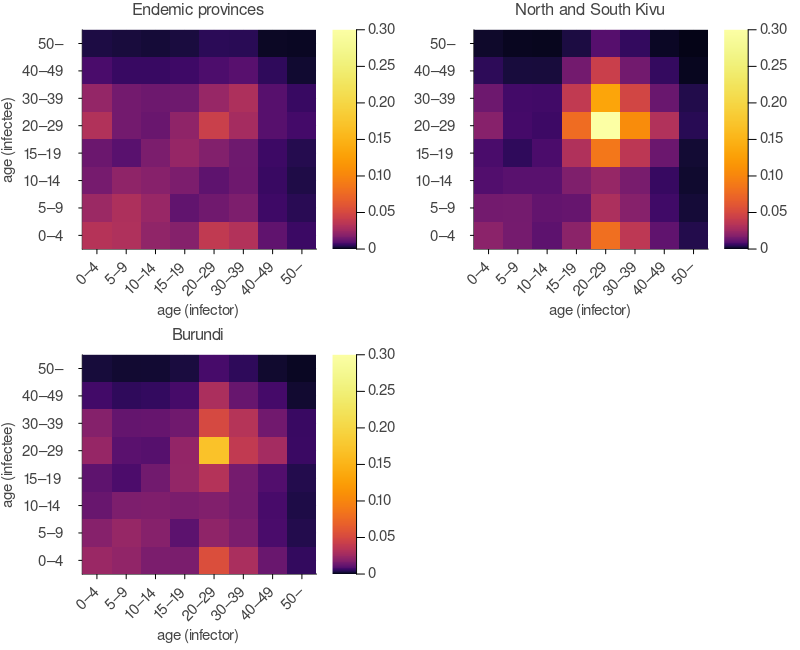

In [32]:
# transmission frequency heatmap
eig_endemic = (ngm=endemic2015_24_fit.zmb_fit|>collect.|>last.|>ngm, eigcases=endemic2015_24_fit.zmb_fit|>collect.|>last.|>dominanteigvec.|>(x->[x]), eigval0 = endemic2015_24_fit.zmb_fit|>collect.|>first.|>dominanteigval,eigval = endemic2015_24_fit.zmb_fit|>collect.|>last.|>dominanteigval)

heats=[begin mixingmatrices = (broadcast.(.*,eig.ngm,(eig.eigcases')|>vec).|>sum)
    R0scale=0.82./(eig_endemic.eigval0)
    mixingmatrices.*=R0scale
    meanmixmat=exp.(mean(broadcast.(log,mixingmatrices),Ib_weights))
    heatmap(meanmixmat,color=cgrad(:inferno,scale=(x->exp(4x))),clim=(0,0.3)) end for eig in [eig_endemic, eig_kivu, eig_kamituga, eig_otherhz, eig_burundi]]

plot(heats[[1,2,5]]...,ticks=(1:8,makeagegrouplabel([0:5:20;30:10:50])),size=(800,650),xrotation=45, 
    xlabel = "age (infector)", title = ["Endemic provinces" "North and South Kivu" "Burundi"], ylabel = ["age (infectee)" "" "age (infectee)"],
    bottom_margin = 2Plots.PlotMeasures.mm) |>savefigname("../figs/fig2/raw/heatmaps.svg", save = false)

In [33]:
# vaccine impact heatmaps
popvaxrange, fswvaxrange = 0:0.5:100, 0:0.5:100
kivu2024_project=deepcopy(kivu2024_fit.zmb_fit)
kivuRmap=vaccineRmap.(kivu2024_project|>collect,eig_endemic.eigval0,ve=0.86,poprange = popvaxrange./100, fswrange = fswvaxrange./100)
burundi2024_project=deepcopy(burundi2024_fit.zmb_fit)
burundiRmap=vaccineRmap.(burundi2024_project|>collect,eig_endemic.eigval0,ve=0.86,poprange = popvaxrange./100, fswrange = fswvaxrange./100);

In [34]:
hm_kivu = heatmap(fswvaxrange,popvaxrange,mean(kivuRmap.|>first,Ib_weights),clim=(0.5,1.5), xticks = (0:20:100), color=cgrad(:coolwarm, [0.0, 0.5, 0.501, 1],categorical=false))
contour!(hm_kivu, fswvaxrange,popvaxrange,mean(kivuRmap.|>first,Ib_weights),contour_labels=true, levels = 0.5:0.1:1.5,color=:black)
hm_burundi = heatmap(fswvaxrange,popvaxrange,mean(burundiRmap.|>first,Ib_weights),clim=(0.5,1.5), xticks = (0:20:100),color=cgrad(:coolwarm, [0.0, 0.5, 0.501, 1],categorical=false))
contour!(hm_burundi,fswvaxrange,popvaxrange,mean(burundiRmap.|>first,Ib_weights),contour_labels=true, levels = 0.5:0.05:1.5,color=:black)
hm2_kivu = heatmap(fswvaxrange,popvaxrange,mean(100 .*(kivuRmap.|>last),Ib_weights),clim=(0.0,60), xticks = (0:20:100), color=cgrad(:Blues_3,rev=true))
contour!(hm2_kivu, fswvaxrange,popvaxrange,mean(100 .*(kivuRmap.|>last),Ib_weights),contour_labels=true, levels = 0.0:5:100,color=:black)
hm2_burundi = heatmap(fswvaxrange,popvaxrange,mean(100 .*(burundiRmap.|>last),Ib_weights),clim=(0.0,60), xticks = (0:20:100),color=cgrad(:Blues_3,rev=true))
contour!(hm2_burundi,fswvaxrange,popvaxrange,mean(100 .*(burundiRmap.|>last),Ib_weights),contour_labels=true, levels = 0.0:5:100,color=:black);

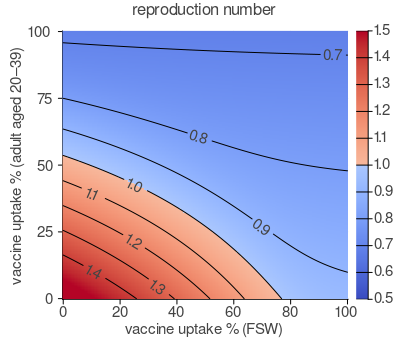

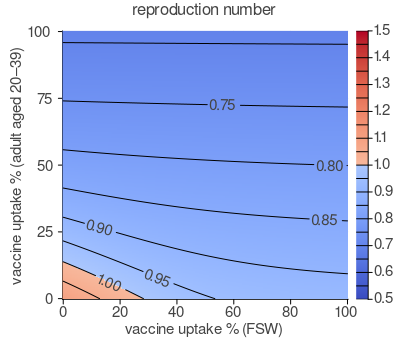

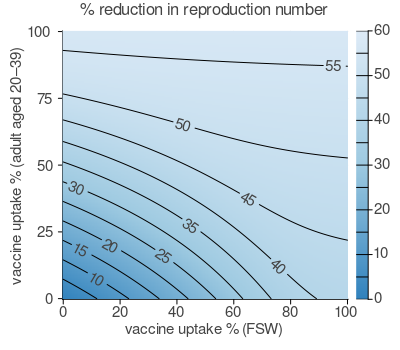

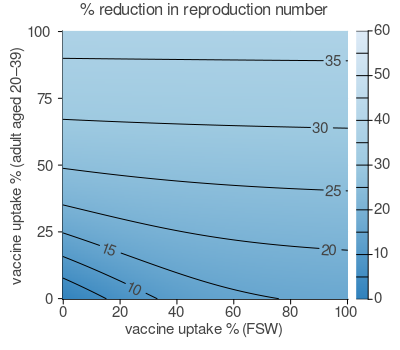

In [35]:
plot(hm_kivu,title = "reproduction number" ,xlabel = "vaccine uptake % (FSW)", ylabel = "vaccine uptake % (adult aged 20–39)",size=(400,350)) |>savefigname("../figs/fig2/raw/kivu_vax.svg",save=false)
plot(hm_burundi,title = "reproduction number",xlabel = "vaccine uptake % (FSW)", ylabel = "vaccine uptake % (adult aged 20–39)",size=(400,350)) |>savefigname("../figs/fig2/raw/burundi_vax.svg",save=false)
plot(hm2_kivu,title = "% reduction in reproduction number" ,xlabel = "vaccine uptake % (FSW)", ylabel = "vaccine uptake % (adult aged 20–39)",size=(400,350)) |>savefigname("../figs/fig2/raw/kivu_red.svg",save=false)
plot(hm2_burundi,title = "% reduction in reproduction number",xlabel = "vaccine uptake % (FSW)", ylabel = "vaccine uptake % (adult aged 20–39)",size=(400,350)) |>savefigname("../figs/fig2/raw/burundi_red.svg",save=false)

## Supple figures

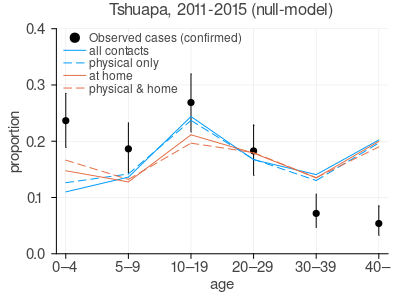

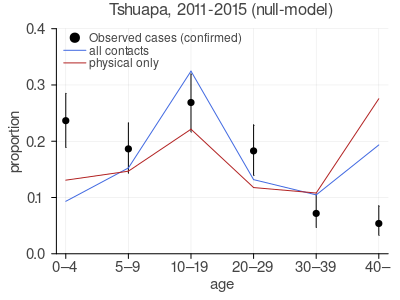

In [36]:
# Eigenvector without accounting for susceptibility
plot(tshuapaplot, zmb2015_original|>collect; label = ["all contacts" "physical only" "at home" "physical & home"],legend=(0.1,0.96),ylim=(0,0.4),color = [1 1 2 2],linestyle = [:solid :dash],title="Tshuapa, 2011-2015 (null-model)")|>savefigname("../figs/Sfigs/raw/null1.svg", save=false)
plot(tshuapaplot, drc2015_original|>collect; label = ["all contacts" "physical only" "at home" "physical & home"],legend=(0.1,0.96),ylim=(0,0.4),color=[:royalblue :firebrick],title="Tshuapa, 2011-2015 (null-model)") |>savefigname("../figs/Sfigs/raw/null2.svg", save=false)

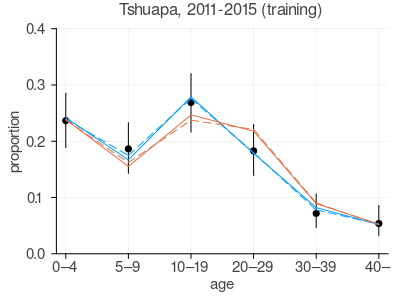

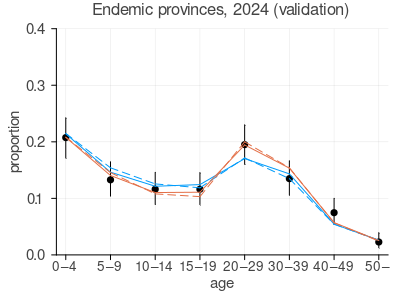

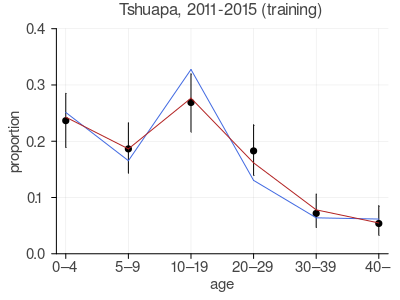

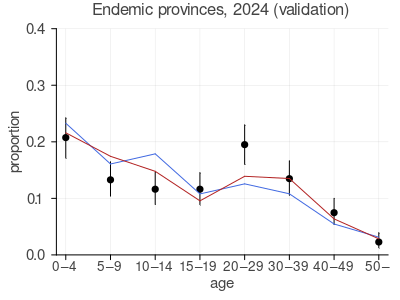

In [37]:
# training vs validation
plot(tshuapa2015_fit.zmb_plot, title="Tshuapa, 2011-2015 (training)",legend=:none)|>savefigname("../figs/Sfigs/raw/train1.svg", save = false)
plot(endemic2024_validate.zmb_plot, title="Endemic provinces, 2024 (validation)",legend=:none) |>savefigname("../figs/Sfigs/raw/train2.svg", save=false)
plot(tshuapa2015_fit.drc_plot, title="Tshuapa, 2011-2015 (training)",legend=:none)|>savefigname("../figs/Sfigs/raw/validation1.svg", save=false)
plot(endemic2024_validate.drc_plot, title="Endemic provinces, 2024 (validation)",legend=:none) |>savefigname("../figs/Sfigs/raw/validation2.svg", save=false)

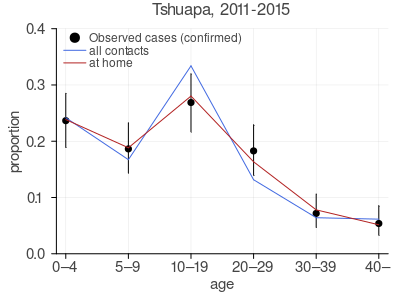

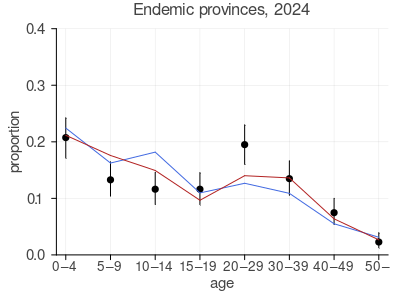

In [38]:
#DRC synthetic matrix
plot(endemic2015_24_fit.drc_plot[1], title="Tshuapa, 2011-2015") |>savefigname("../figs/Sfigs/raw/syn_tshuapa.svg", save = false)
plot(endemic2015_24_fit.drc_plot[2], title="Endemic provinces, 2024",legend=:none) |>savefigname("../figs/Sfigs/raw/syn_endemicprovs.svg", save = false)

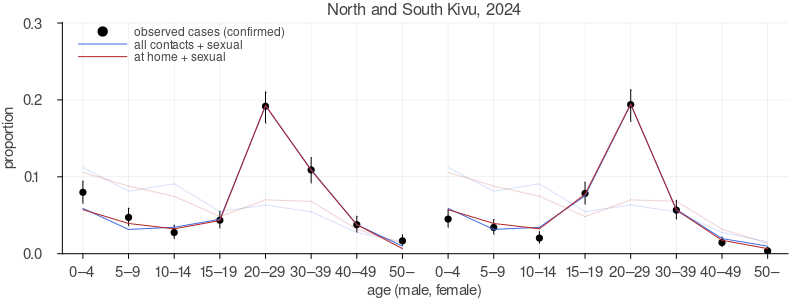

In [39]:
plot(kivu2024_fit.drc_plot, kivu2024_validate.drc_fit|>collect, title="North and South Kivu, 2024",size=(800,300),xrotation=0,bottom_margin=4Plots.PlotMeasures.mm,left_margin=3Plots.PlotMeasures.mm,ylim=(0,0.301),xlabel="age (male, female)",
        color =[:royalblue :firebrick],linealpha=[fill(0.2,7);0],label=:none) |>savefigname("../figs/Sfigs/raw/syn_kivu.svg", save = false)

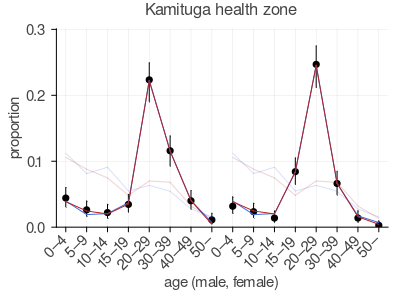

In [40]:
plot(kamituga2024_fit.drc_plot, kamituga2024_validate.drc_fit|>collect, title="Kamituga health zone",size=(400,300),xrotation=45,bottom_margin=3Plots.PlotMeasures.mm,legend=:none,ylim=(0,0.301),
    color =[:royalblue :firebrick],linealpha=[fill(0.2,7);0],label=:none,xlabel="age (male, female)") |>savefigname("../figs/Sfigs/raw/syn_kamituga.svg", save = false)

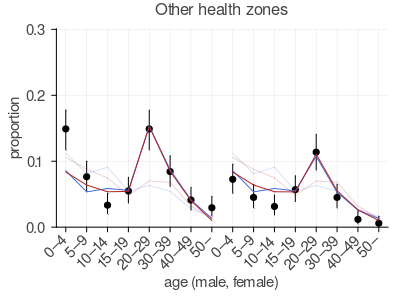

In [41]:
plot(otherhz2024_fit.drc_plot, otherhz2024_validate.drc_fit|>collect, title="Other health zones",size=(400,300),xrotation=45,bottom_margin=3Plots.PlotMeasures.mm,legend=:none,ylim=(0,0.301),
        color =[:royalblue :firebrick],linealpha=[fill(0.2,7);0],label=:none,xlabel="age (male, female)") |>savefigname("../figs/Sfigs/raw/syn_otherhz.svg", save =false)

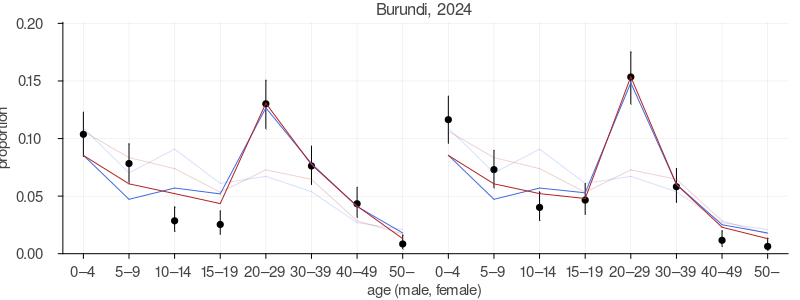

In [42]:
plot(burundi2024_fit.drc_plot, burundi2024_validate.drc_fit|>collect, title="Burundi, 2024",size=(800,300),xrotation=0,bottom_margin=4Plots.PlotMeasures.mm,legend=:none,ylim=(0,0.201),
        color =[:royalblue :firebrick],linealpha=[fill(0.2,7);0],label=:none,xlabel="age (male, female)") |>savefigname("../figs/Sfigs/raw/syn_burundi.svg", save =false)

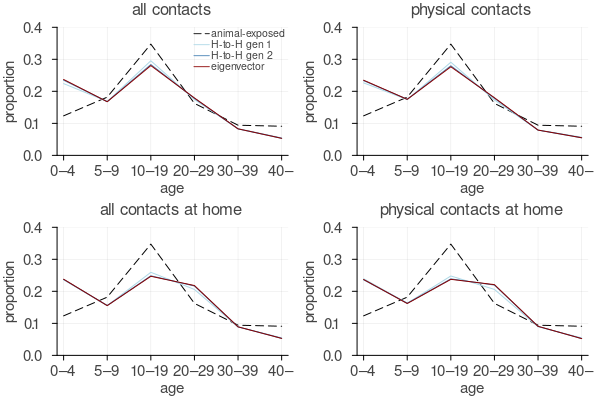

In [43]:
# NGM convergence check
ngm_tshuapa2015 = ngm.(endemic2015_24_fit.zmb_fit|>collect.|>first).|>first
tshuapa_zoonotic = aggregatecategories(readJSON(:tshuapa2015_zoonotic))
casegens = normalize.((ngm_tshuapa2015).^[0 1 2 100].*tshuapa_zoonotic.cases,1)
plot([plot(casegens[x,:], xticks=(1:6,makeagegrouplabel(tshuapa_zoonotic)),ylim=(0,0.4),xlabel="age",ylabel="proportion",label=["animal-exposed" "H-to-H gen ".*string.((1:2)') "eigenvector"],
    color = [:black :lightblue :steelblue :darkred],linestyle = [:dash :solid :solid :solid]) for x in 1:4]...,size = (600,400),legendfontsize=7, legend=[(0.67,0.95) :none :none :none], title = ["all contacts" "physical contacts" "all contacts at home" "physical contacts at home"]) |>savefigname("../figs/Sfigs/raw/convergence1.svg", save =false)

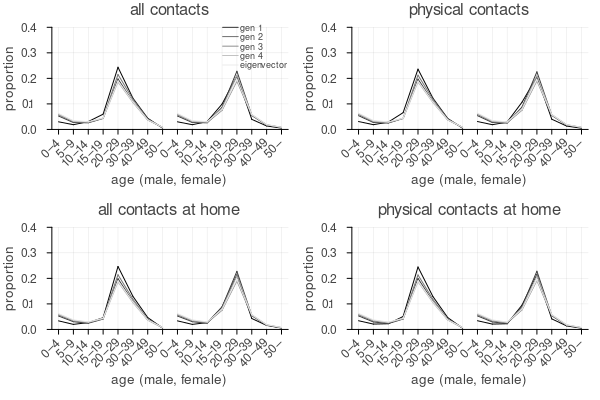

In [44]:
ngm_kivu2024 = collapseblockmat.(ngm.(kivu2024_fit.zmb_fit|>collect))
initcases=Int.(in.((1:32), Ref([4,20])))
casegens = normalize.(reduce.(vcat,splitsum.(ngm_kivu2024.^[(1:4)' 100].*Ref(initcases),4,Ref([1,3]))),1)
plot([plot(casegens[x,:], xticks=(1:16,repeat(makeagegrouplabel(drc_kivu),2)),xrotation=45,ylim=(0,0.4),linealpha=Float64.((1:16).!=8),xlabel="age (male, female)",ylabel="proportion",label=["gen ".*string.((1:4)') "eigenvector"],tickfontsize = 8,labelfontsize=9, bottom_margin=5Plots.PlotMeasures.mm,
    color = Gray.((range(0,0.9,length=5))')) for x in 1:4]...,size = (600,400),legendfontsize=6, legend=[(0.8,1) :none :none :none], title = ["all contacts" "physical contacts" "all contacts at home" "physical contacts at home"]) |>savefigname("../figs/Sfigs/raw/convergence2.svg", save =false)

In [45]:
# Estimated proportion of sexually active individuals
dictkeys = ["kivu2024_fit", "kamituga2024_fit", "otherhz2024_fit", "burundi2024_fit"]
mixposteriors = [MixtureModel(posteriorjointdist.(cms),Ib_weights) for cms in getindex.(Ref(loadfit),dictkeys).|>first.|>collect]

drc_na = loadfit["kivu2024_fit"][1][1].misc[:pop]
bdi_na = loadfit["burundi2024_fit"][1][1].misc[:pop]
Random.seed!(123)
postsamples = rand.(mixposteriors,1000) # posterior samples from averaged model

activepops = [begin
    m_active = cumsum(na[1:4].*samples[1:4,:],dims=1)
    m_active./=m_active[end:end,:]
    f_active = cumsum(na[5:8].*samples[5:8,:],dims=1)
    f_active./=f_active[end:end,:]
    medians=median([m_active;f_active],dims=2)
    errors = abs.(quantile.(eachrow([m_active;f_active]),[0.025 0.975]).-medians)
    [diff([0.;medians[1:4];0.;medians[5:8]],dims=1)[[1:4;6:end]] [zeros(1,2); errors[1:end-1,:]]]
    end for (samples, na) in zip(postsamples, [fill(drc_na,3);[bdi_na]])]
m_medians=reduce(hcat,getindex.(activepops,Ref(1:4),1))'
f_medians=reduce(hcat,getindex.(activepops,Ref(5:8),1))'
m_error=(reduce(hcat,getindex.(activepops,Ref(1:4),3))',reduce(hcat,getindex.(activepops,Ref(1:4),2))')
f_error=(reduce(hcat,getindex.(activepops,Ref(5:8),3))',reduce(hcat,getindex.(activepops,Ref(5:8),2))');

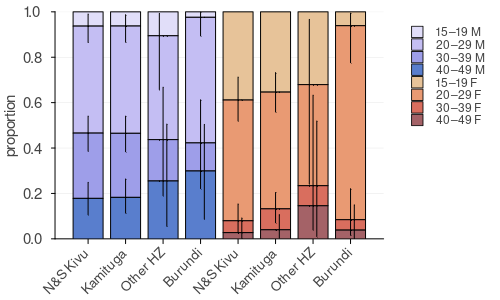

In [46]:
colors=repeat([collect(palette(:devon,8))[7:-1:4] collect(palette(:lipari,9))[8:-1:5]]|>permutedims,inner=(4,1))
groupedbar([m_medians; f_medians] ,bar_position=:stack,color=colors,legend=:none,label=false,ms = 0)
plot!((1:8).+0.1.*[0,0,1,1,1,1,1,1],1 .-cumsum([m_medians; f_medians],dims=2)[:,1:end-1], markershape=:none,color=:black, seriestype=:scatter, yerror=([m_error[1];f_error[1]][:,2:end].*[0 0 1],[m_error[2];f_error[2]][:,2:end].*[0 0 1]),ms=0,label=false)
plot!((1:8).-0.1.*[0,0,1,0,0,0,1,0],1 .-cumsum([m_medians; f_medians],dims=2)[:,1:end-1], markershape=:none,color=:black, seriestype=:scatter, yerror=([m_error[1];f_error[1]][:,2:end].*[1 0 0],[m_error[2];f_error[2]][:,2:end].*[1 0 0]),ms=0,label=false)
plot!((1:8),1 .-cumsum([m_medians; f_medians],dims=2)[:,1:end-1], markershape=:none,color=:black, seriestype=:scatter, yerror=([m_error[1];f_error[1]][:,2:end].*[0 1 0],[m_error[2];f_error[2]][:,2:end].*[0 1 0]),ms=0,label=false)

labels=string.([15,20,30,40]).*"–".*string.([19,29,39,49]).*[" M" " F"]|>vec|>permutedims
scatter!(fill(-1,8,8),markershape=:square,ylim=(0,1),color=colors[[1,5],:]|>permutedims|>vec|>permutedims,legend=:outertopright,label=labels,size=(500,300),
ylabel="proportion",xticks=(1:8,repeat(["N&S Kivu","Kamituga","Other HZ", "Burundi"],2)),xrotation=45,bottom_margin=4Plots.mm,xtickfontsize=9)|>savefigname("../figs/Sfigs/raw/activepop.svg",save=false)

In [47]:
[quantile.(eachrow(postsamples[x][9:10,:]),Ref([0.025,0.5,0.975])) for x in 1:4]

4-element Vector{Vector{Vector{Float64}}}:
 [[1.6736221703200789, 2.091066302271695, 2.620332329414693], [1.1254779453740182, 1.4359077154955604, 1.8022673568491008]]
 [[2.081643616041761, 2.731386186220152, 3.6243145182707415], [1.9652196552773442, 2.617174626692388, 3.4121762478706454]]
 [[1.2812788297724511, 3.2419106611128305, 5.831933421196721], [0.02275239884428523, 0.2409008873830516, 0.8511486301646563]]
 [[0.6817082143094072, 1.1618376896605085, 1.861125787857879], [0.6989499673085889, 1.2082543323794728, 2.0391739122506367]]

In [48]:
[quantile(sqrt.(prod(postsamples[x][9:10,:],dims=1)|>vec),[0.025,0.5,0.975]) for x in 1:4]

4-element Vector{Vector{Float64}}:
 [1.5883715182900076, 1.7325101407034191, 1.8947625212325336]
 [2.292313601072504, 2.6371822212300122, 3.1635374987575196]
 [0.3255472086183362, 0.8847120528803354, 1.1742297277156835]
 [1.0750996402011552, 1.1706815581483412, 1.259387870021571]

In [49]:
[quantile(sqrt.(diff(log.(postsamples[x][9:10,:]),dims=1).|>exp|>vec),[0.025,0.5,0.975]) for x in 1:4]

4-element Vector{Vector{Float64}}:
 [0.669847468350188, 0.8293138697380772, 1.0189060745660616]
 [0.7901913985730044, 0.9780651699039934, 1.2211226516838574]
 [0.06769707455443386, 0.2664486876636154, 0.8362616597913772]
 [0.6083858671128476, 1.015960813249865, 1.7166122427613677]